In [1]:
import numpy as np
import pandas as pd
import torch
from sklearn.cluster import KMeans
from sklearn.cluster import Birch
import matplotlib.cm as cm
import math
import pickle as pkl
import matplotlib.pyplot as plt
# Single methods
from sklearn.preprocessing import MinMaxScaler as Normalizer
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from sklearn.neighbors import kneighbors_graph
from sklearn import metrics
from sklearn.metrics import silhouette_samples
from Modules.Clustering_Utils_Zamuro import plot_silhouette
from Modules.Clustering_Utils_Zamuro import plot_centroids
from Modules.Clustering_Utils_Zamuro import ClusteringResults
from sklearn.metrics import davies_bouldin_score as DB
from sklearn.metrics import calinski_harabasz_score as CH

import warnings
warnings.filterwarnings("ignore")

import random
def _set_seed(seed: int):
    """
    Helper function for reproducible behavior to set the seed in ``random``, ``numpy``, ``torch`` and/or ``tf`` (if
    installed).
 
    Args:
        seed (:obj:`int`): The seed to set.
    """
    random.seed(seed)
    np.random.seed(seed)
    if torch.cuda.is_available():
        torch.manual_seed(seed)
        torch.cuda.manual_seed_all(seed)
        # ^^ safe to call this function even if cuda is not available
_set_seed(1024)

root = "/home/mirp_ai/Documents/Daniel_Nieto/PhD/AutoEncoders_Ecoacoustics"

## Kmeans Normal Results

In [3]:
day = 3
with open(f"temporal_zamuro/zamuro_clustering_results/AE/Kmeans_Normal/{day}silhouette_n-clusters_33", "rb") as file:
    silhouette = pkl.load(file)
    
with open(f"temporal_zamuro/zamuro_clustering_results/AE/Kmeans_Normal/{day}DB_n-clusters_33", "rb") as file:
    db = pkl.load(file)
    
with open(f"temporal_zamuro/zamuro_clustering_results/AE/Kmeans_Normal/{day}CH_n-clusters_33", "rb") as file:
    ch = pkl.load(file)

silhouette_reshape = [[x] for x in silhouette]
silhouette_norm = Normalizer().fit_transform(silhouette_reshape)
db_reshape = [[x] for x in db]
db_norm = Normalizer().fit_transform(db_reshape)
db_norm = 1-db_norm
ch_reshape = [[x] for x in ch]
ch_norm = Normalizer().fit_transform(ch_reshape)

# Kmeans Normal

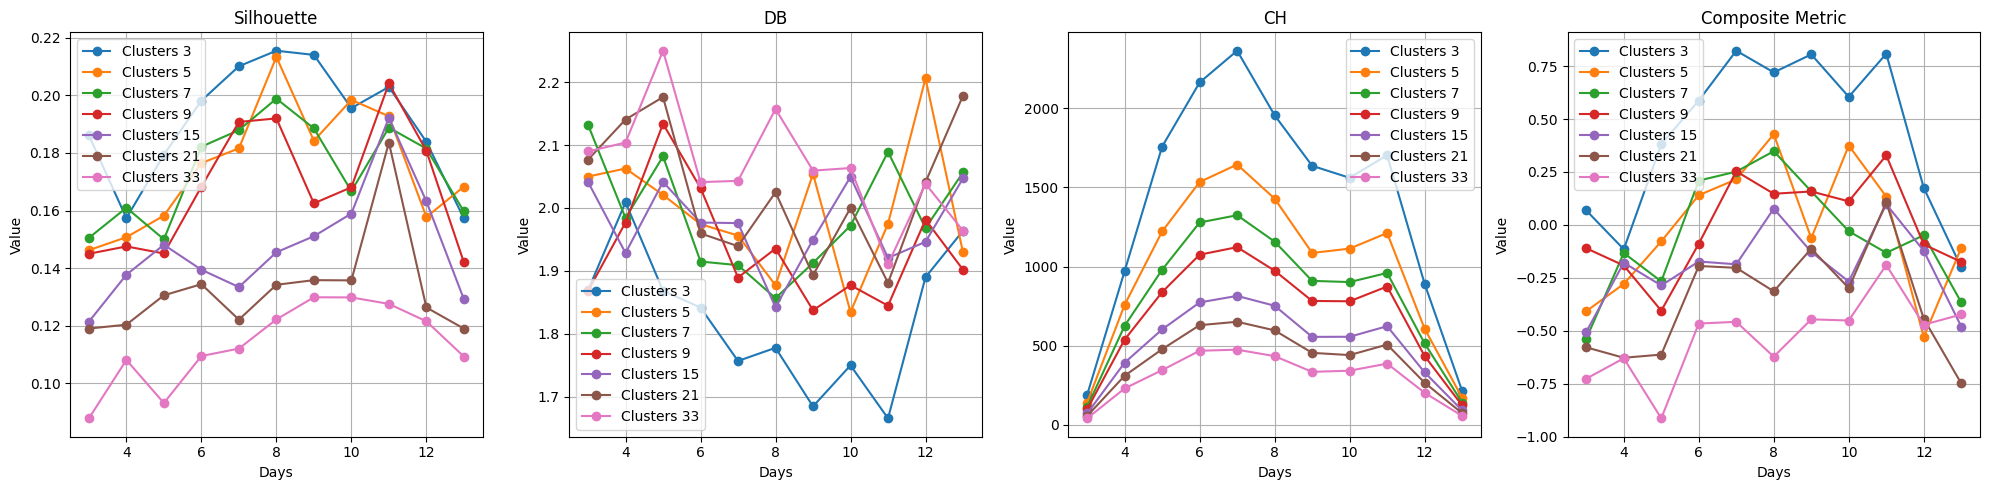

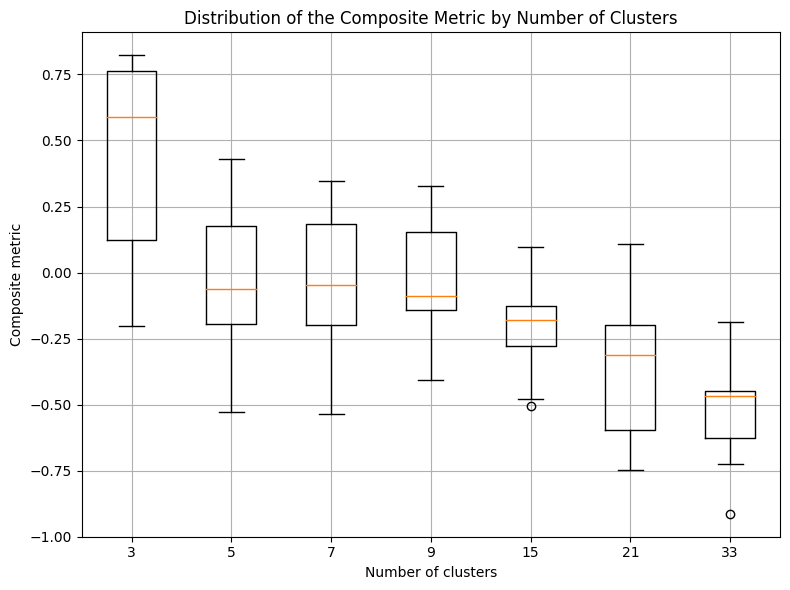

In [47]:
import pickle as pkl
import numpy as np
import matplotlib.pyplot as plt

# Días del experimento
days = list(range(3, 14))  # Días del 3 al 13

# Diccionarios para almacenar los resultados por número de clusters
silhouette_results = {}
db_results = {}
ch_results = {}

# Leer los datos
for day in days:
    with open(f"temporal_zamuro/zamuro_clustering_results/Days_Results/AE/Kmeans_Normal/{day}/silhouette_n-clusters_33", "rb") as file:
        silhouette = pkl.load(file)
    with open(f"temporal_zamuro/zamuro_clustering_results/Days_Results/AE/Kmeans_Normal/{day}/DB_n-clusters_33", "rb") as file:
        db = pkl.load(file)
    with open(f"temporal_zamuro/zamuro_clustering_results/Days_Results/AE/Kmeans_Normal/{day}/CH_n-clusters_33", "rb") as file:
        ch = pkl.load(file)
    
    # Almacenar los valores por número de clusters
    for i, n_clusters in enumerate([3, 5, 7, 9, 15, 21, 33]):  # Ajusta según corresponda
        silhouette_results.setdefault(n_clusters, []).append(silhouette[i])
        db_results.setdefault(n_clusters, []).append(db[i])
        ch_results.setdefault(n_clusters, []).append(ch[i])

# Función para calcular estadísticas
def calculate_statistics(data):
    stats = {}
    for n_clusters, values in data.items():
        values = np.array(values)
        stats[n_clusters] = {
            "mean": np.mean(values),
            "median": np.median(values),
            "std": np.std(values),
            "min": np.min(values),
            "max": np.max(values)
        }
    return stats

# Normalizar los valores
def normalize(data):
    all_values = np.concatenate(list(data.values()))
    min_val, max_val = np.min(all_values), np.max(all_values)
    return {k: (np.array(v) - min_val) / (max_val - min_val) for k, v in data.items()}

# Calcular estadísticas por número de clusters
silhouette_stats = calculate_statistics(silhouette_results)
db_stats = calculate_statistics(db_results)
ch_stats = calculate_statistics(ch_results)

# Normalizar las métricas
silhouette_norm = normalize(silhouette_results)
db_norm = normalize(db_results)
ch_norm = normalize(ch_results)

# Calcular métrica compuesta
composite_metric = {}
for n_clusters in silhouette_norm:
    composite_metric[n_clusters] = (silhouette_norm[n_clusters] + ch_norm[n_clusters]) / 2 - db_norm[n_clusters]

# Graficar las métricas
fig, axes = plt.subplots(1, 4, figsize=(20, 5))
metrics = [(silhouette_results, "Silhouette"), (db_results, "DB"), (ch_results, "CH"), (composite_metric, "Composite Metric")]

for ax, (results, title) in zip(axes, metrics):
    for n_clusters, values in results.items():
        ax.plot(days, values, marker='o', label=f'Clusters {n_clusters}')
    ax.set_title(title)
    ax.set_xlabel("Days")
    ax.set_ylabel("Value")
    ax.legend()
    ax.grid(True)

plt.tight_layout()
plt.savefig(f"temporal_zamuro/zamuro_clustering_results/Days_Results/AE/Kmeans_Normal/Days_Results_metrics.pdf",format="PDF")

plt.show()

# Graficar Boxplot para la métrica compuesta
plt.figure(figsize=(8, 6))
plt.boxplot([composite_metric[n] for n in sorted(composite_metric.keys())], labels=sorted(composite_metric.keys()))
plt.title("Distribution of the Composite Metric by Number of Clusters")
plt.xlabel("Number of clusters")
plt.ylabel("Composite metric")
plt.grid(True)
plt.tight_layout()
plt.savefig(f"temporal_zamuro/zamuro_clustering_results/Days_Results/AE/Kmeans_Normal/Days_Results_composite_metric.pdf",format="PDF")
plt.show()


# Kmean UMAP

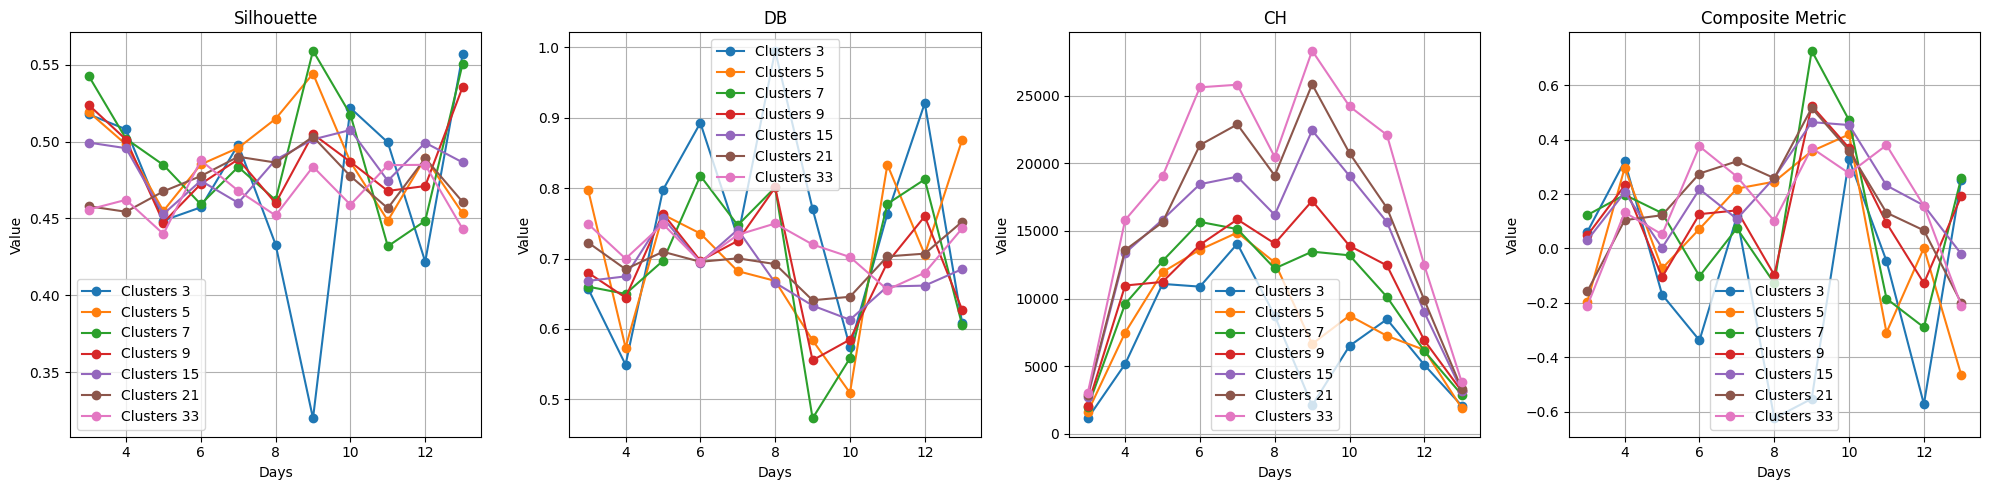

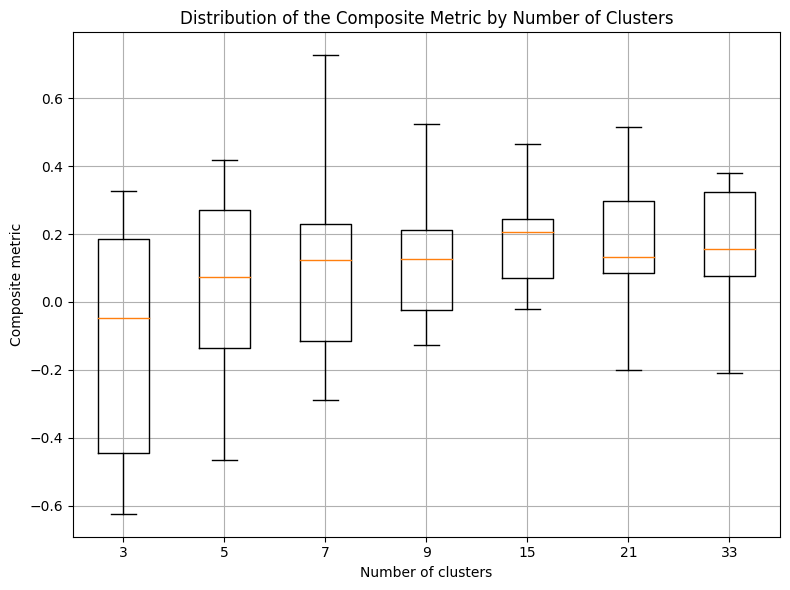

In [46]:
import pickle as pkl
import numpy as np
import matplotlib.pyplot as plt

# Días del experimento
days = list(range(3, 14))  # Días del 3 al 13

# Diccionarios para almacenar los resultados por número de clusters
silhouette_results = {}
db_results = {}
ch_results = {}

# Leer los datos
for day in days:
    with open(f"temporal_zamuro/zamuro_clustering_results/Days_Results/AE/Kmeans_UMAP/{day}/silhouette_n-clusters_33", "rb") as file:
        silhouette = pkl.load(file)
    with open(f"temporal_zamuro/zamuro_clustering_results/Days_Results/AE/Kmeans_UMAP/{day}/DB_n-clusters_33", "rb") as file:
        db = pkl.load(file)
    with open(f"temporal_zamuro/zamuro_clustering_results/Days_Results/AE/Kmeans_UMAP/{day}/CH_n-clusters_33", "rb") as file:
        ch = pkl.load(file)
    
    # Almacenar los valores por número de clusters
    for i, n_clusters in enumerate([3, 5, 7, 9, 15, 21, 33]):  # Ajusta según corresponda
        silhouette_results.setdefault(n_clusters, []).append(silhouette[i])
        db_results.setdefault(n_clusters, []).append(db[i])
        ch_results.setdefault(n_clusters, []).append(ch[i])

# Función para calcular estadísticas
def calculate_statistics(data):
    stats = {}
    for n_clusters, values in data.items():
        values = np.array(values)
        stats[n_clusters] = {
            "mean": np.mean(values),
            "median": np.median(values),
            "std": np.std(values),
            "min": np.min(values),
            "max": np.max(values)
        }
    return stats

# Normalizar los valores
def normalize(data):
    all_values = np.concatenate(list(data.values()))
    min_val, max_val = np.min(all_values), np.max(all_values)
    return {k: (np.array(v) - min_val) / (max_val - min_val) for k, v in data.items()}

# Calcular estadísticas por número de clusters
silhouette_stats = calculate_statistics(silhouette_results)
db_stats = calculate_statistics(db_results)
ch_stats = calculate_statistics(ch_results)

# Normalizar las métricas
silhouette_norm = normalize(silhouette_results)
db_norm = normalize(db_results)
ch_norm = normalize(ch_results)

# Calcular métrica compuesta
composite_metric = {}
for n_clusters in silhouette_norm:
    composite_metric[n_clusters] = (silhouette_norm[n_clusters] + ch_norm[n_clusters]) / 2 - db_norm[n_clusters]

# Graficar las métricas
fig, axes = plt.subplots(1, 4, figsize=(20, 5))
metrics = [(silhouette_results, "Silhouette"), (db_results, "DB"), (ch_results, "CH"), (composite_metric, "Composite Metric")]

for ax, (results, title) in zip(axes, metrics):
    for n_clusters, values in results.items():
        ax.plot(days, values, marker='o', label=f'Clusters {n_clusters}')
    ax.set_title(title)
    ax.set_xlabel("Days")
    ax.set_ylabel("Value")
    ax.legend()
    ax.grid(True)

plt.tight_layout()
plt.savefig(f"temporal_zamuro/zamuro_clustering_results/Days_Results/AE/Kmeans_UMAP/Days_Results_metrics.pdf",format="PDF")

plt.show()

# Graficar Boxplot para la métrica compuesta
plt.figure(figsize=(8, 6))
plt.boxplot([composite_metric[n] for n in sorted(composite_metric.keys())], labels=sorted(composite_metric.keys()))
plt.title("Distribution of the Composite Metric by Number of Clusters")
plt.xlabel("Number of clusters")
plt.ylabel("Composite metric")
plt.grid(True)
plt.tight_layout()
plt.savefig(f"temporal_zamuro/zamuro_clustering_results/Days_Results/AE/Kmeans_UMAP/Days_Results_composite_metric.pdf",format="PDF")
plt.show()


# Kmeans PacMAP

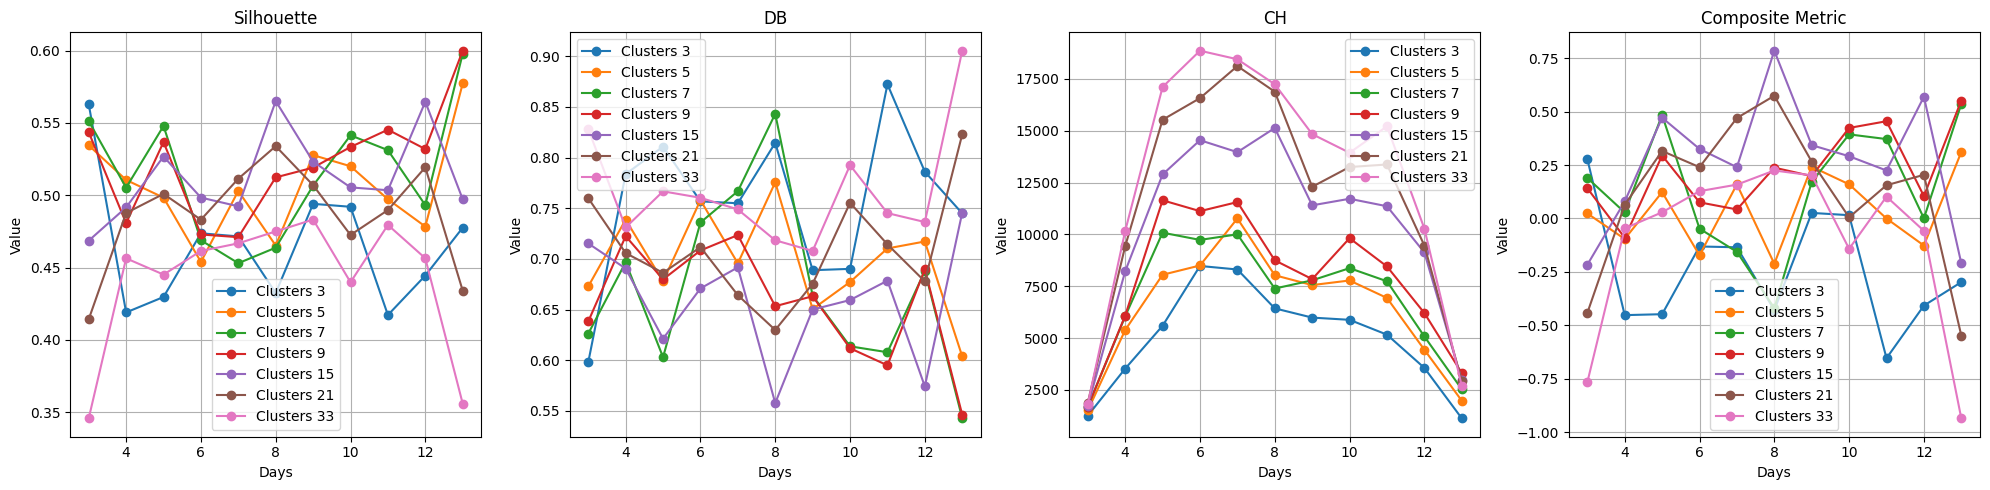

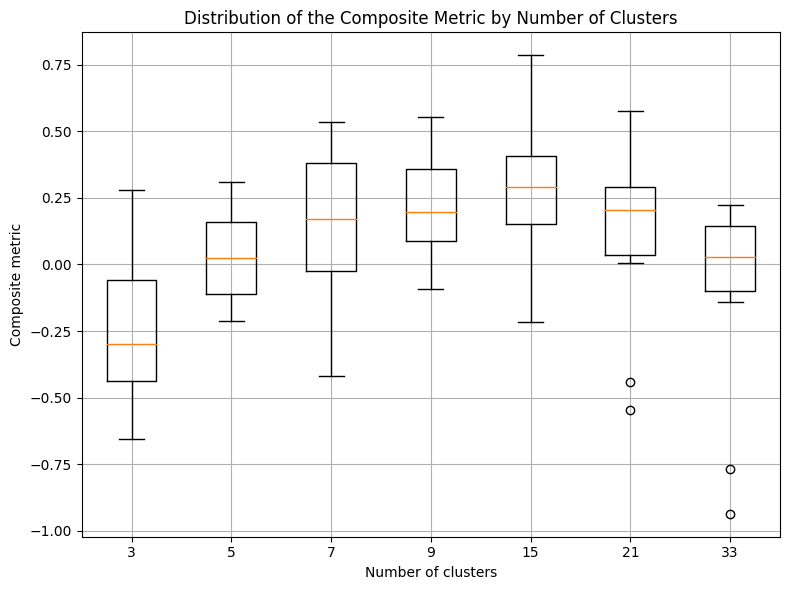

In [45]:
import pickle as pkl
import numpy as np
import matplotlib.pyplot as plt

# Días del experimento
days = list(range(3, 14))  # Días del 3 al 13

# Diccionarios para almacenar los resultados por número de clusters
silhouette_results = {}
db_results = {}
ch_results = {}

# Leer los datos
for day in days:
    with open(f"temporal_zamuro/zamuro_clustering_results/Days_Results/AE/Kmeans_PacMAP/{day}/silhouette_n-clusters_33", "rb") as file:
        silhouette = pkl.load(file)
    with open(f"temporal_zamuro/zamuro_clustering_results/Days_Results/AE/Kmeans_PacMAP/{day}/DB_n-clusters_33", "rb") as file:
        db = pkl.load(file)
    with open(f"temporal_zamuro/zamuro_clustering_results/Days_Results/AE/Kmeans_PacMAP/{day}/CH_n-clusters_33", "rb") as file:
        ch = pkl.load(file)
    
    # Almacenar los valores por número de clusters
    for i, n_clusters in enumerate([3, 5, 7, 9, 15, 21, 33]):  # Ajusta según corresponda
        silhouette_results.setdefault(n_clusters, []).append(silhouette[i])
        db_results.setdefault(n_clusters, []).append(db[i])
        ch_results.setdefault(n_clusters, []).append(ch[i])

# Función para calcular estadísticas
def calculate_statistics(data):
    stats = {}
    for n_clusters, values in data.items():
        values = np.array(values)
        stats[n_clusters] = {
            "mean": np.mean(values),
            "median": np.median(values),
            "std": np.std(values),
            "min": np.min(values),
            "max": np.max(values)
        }
    return stats

# Normalizar los valores
def normalize(data):
    all_values = np.concatenate(list(data.values()))
    min_val, max_val = np.min(all_values), np.max(all_values)
    return {k: (np.array(v) - min_val) / (max_val - min_val) for k, v in data.items()}

# Calcular estadísticas por número de clusters
silhouette_stats = calculate_statistics(silhouette_results)
db_stats = calculate_statistics(db_results)
ch_stats = calculate_statistics(ch_results)

# Normalizar las métricas
silhouette_norm = normalize(silhouette_results)
db_norm = normalize(db_results)
ch_norm = normalize(ch_results)

# Calcular métrica compuesta
composite_metric = {}
for n_clusters in silhouette_norm:
    composite_metric[n_clusters] = (silhouette_norm[n_clusters] + ch_norm[n_clusters]) / 2 - db_norm[n_clusters]

# Graficar las métricas
fig, axes = plt.subplots(1, 4, figsize=(20, 5))
metrics = [(silhouette_results, "Silhouette"), (db_results, "DB"), (ch_results, "CH"), (composite_metric, "Composite Metric")]

for ax, (results, title) in zip(axes, metrics):
    for n_clusters, values in results.items():
        ax.plot(days, values, marker='o', label=f'Clusters {n_clusters}')
    ax.set_title(title)
    ax.set_xlabel("Days")
    ax.set_ylabel("Value")
    ax.legend()
    ax.grid(True)

plt.tight_layout()
plt.savefig(f"temporal_zamuro/zamuro_clustering_results/Days_Results/AE/Kmeans_PacMAP/Days_Results_metrics.pdf",format="PDF")
plt.show()

# Graficar Boxplot para la métrica compuesta
plt.figure(figsize=(8, 6))
plt.boxplot([composite_metric[n] for n in sorted(composite_metric.keys())], labels=sorted(composite_metric.keys()))
plt.title("Distribution of the Composite Metric by Number of Clusters")
plt.xlabel("Number of clusters")
plt.ylabel("Composite metric")
plt.grid(True)
plt.tight_layout()
plt.savefig(f"temporal_zamuro/zamuro_clustering_results/Days_Results/AE/Kmeans_PacMAP/Days_Results_composite_metric.pdf",format="PDF")
plt.show()

In [3]:
import pickle as pkl
import numpy as np
import matplotlib.pyplot as plt

# Días del experimento
days = list(range(3, 14))  # Días del 3 al 13

# Diccionarios para almacenar los resultados por número de clusters
silhouette_results = {}
db_results = {}
ch_results = {}
dvpc = {}

# Leer los datos
for day in days:
    with open(f"temporal_zamuro/zamuro_clustering_results/Days_Results/AE/DBSCAN_PacMAP/{day}/silhouette_eps_[0.01, 0.05, 0.1, 0.2, 0.5, 0.75, 1, 1.5]_min_samples_[5, 25, 150, 300, 500, 1000]", "rb") as file:
        silhouette = pkl.load(file)
    with open(f"temporal_zamuro/zamuro_clustering_results/Days_Results/AE/DBSCAN_PacMAP/{day}/DB_eps_[0.01, 0.05, 0.1, 0.2, 0.5, 0.75, 1, 1.5]_min_samples_[5, 25, 150, 300, 500, 1000]", "rb") as file:
        db = pkl.load(file)
    with open(f"temporal_zamuro/zamuro_clustering_results/Days_Results/AE/DBSCAN_PacMAP/{day}/CH_eps_[0.01, 0.05, 0.1, 0.2, 0.5, 0.75, 1, 1.5]_min_samples_[5, 25, 150, 300, 500, 1000]", "rb") as file:
        ch = pkl.load(file)
    with open(f"temporal_zamuro/zamuro_clustering_results/Days_Results/AE/DBSCAN_PacMAP/{day}/DPVC_eps_[0.01, 0.05, 0.1, 0.2, 0.5, 0.75, 1, 1.5]_min_samples_[5, 25, 150, 300, 500, 1000]", "rb") as file:
        dpvc = pkl.load(file)

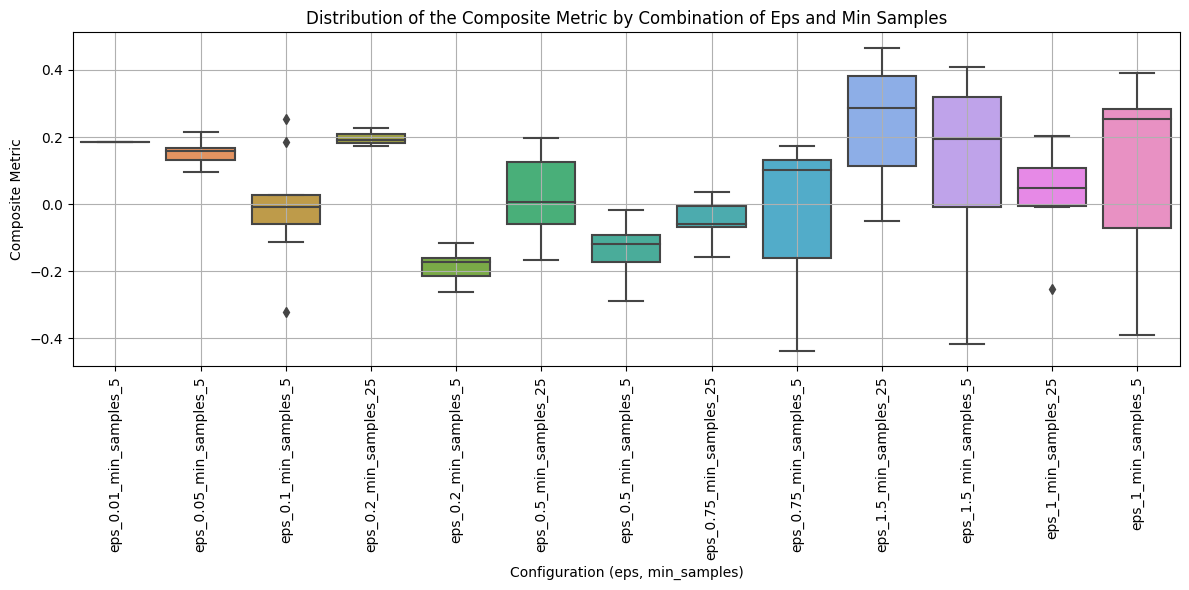

In [44]:
import pickle as pkl
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Días del experimento
days = list(range(3, 14))  # Días del 3 al 13

# Diccionarios para almacenar los resultados por combinación de eps y min_samples
silhouette_results = {}
db_results = {}
ch_results = {}
dpvc_results = {}

# Leer los datos
for day in days:
    with open(f"temporal_zamuro/zamuro_clustering_results/Days_Results/AE/DBSCAN_PacMAP_old/{day}/silhouette_eps_[0.01, 0.05, 0.1, 0.2, 0.5, 0.75, 1, 1.5]_min_samples_[5, 25, 150, 300, 500, 1000]", "rb") as file:
        silhouette = pkl.load(file)
    with open(f"temporal_zamuro/zamuro_clustering_results/Days_Results/AE/DBSCAN_PacMAP_old/{day}/DB_eps_[0.01, 0.05, 0.1, 0.2, 0.5, 0.75, 1, 1.5]_min_samples_[5, 25, 150, 300, 500, 1000]", "rb") as file:
        db = pkl.load(file)
    with open(f"temporal_zamuro/zamuro_clustering_results/Days_Results/AE/DBSCAN_PacMAP_old/{day}/CH_eps_[0.01, 0.05, 0.1, 0.2, 0.5, 0.75, 1, 1.5]_min_samples_[5, 25, 150, 300, 500, 1000]", "rb") as file:
        ch = pkl.load(file)
    with open(f"temporal_zamuro/zamuro_clustering_results/Days_Results/AE/DBSCAN_PacMAP_old/{day}/DPVC_eps_[0.01, 0.05, 0.1, 0.2, 0.5, 0.75, 1, 1.5]_min_samples_[5, 25, 150, 300, 500, 1000]", "rb") as file:
        dpvc = pkl.load(file)
    
    # Almacenar los valores evitando None
    for key in silhouette.keys():
        if silhouette[key] is not None:
            silhouette_results.setdefault(key, []).append(silhouette[key])
        if db[key] is not None:
            db_results.setdefault(key, []).append(db[key])
        if ch[key] is not None:
            ch_results.setdefault(key, []).append(ch[key])
        if dpvc[key] is not None:
            dpvc_results.setdefault(key, []).append(dpvc[key])

# Normalizar los valores
def normalize(data):
    all_values = np.concatenate([v for v in data.values() if len(v) > 0])
    min_val, max_val = np.min(all_values), np.max(all_values)
    return {k: (np.array(v) - min_val) / (max_val - min_val) if len(v) > 0 else [] for k, v in data.items()}

# Normalizar las métricas
silhouette_norm = normalize(silhouette_results)
db_norm = normalize(db_results)
ch_norm = normalize(ch_results)
dpvc_norm = normalize(dpvc_results)

# Calcular métrica compuesta incluyendo DPVC
composite_metric = {}
for key in silhouette_norm:
    if len(silhouette_norm[key]) > 0:
        composite_metric[key] = (silhouette_norm[key] + ch_norm[key] + dpvc_norm[key]) / 3 - db_norm[key]

# Graficar Boxplot para la métrica compuesta
plt.figure(figsize=(12, 6))
sns.boxplot(data=[composite_metric[k] for k in sorted(composite_metric.keys())])
plt.xticks(ticks=range(len(sorted(composite_metric.keys()))), labels=sorted(composite_metric.keys()), rotation=90)
plt.title("Distribution of the Composite Metric by Combination of Eps and Min Samples")  
plt.xlabel("Configuration (eps, min_samples)")  
plt.ylabel("Composite Metric")  
plt.grid(True)
plt.tight_layout()
plt.savefig(f"temporal_zamuro/zamuro_clustering_results/Days_Results/AE/DBSCAN_PacMAP/Days_Results_Boxplot")
plt.show()



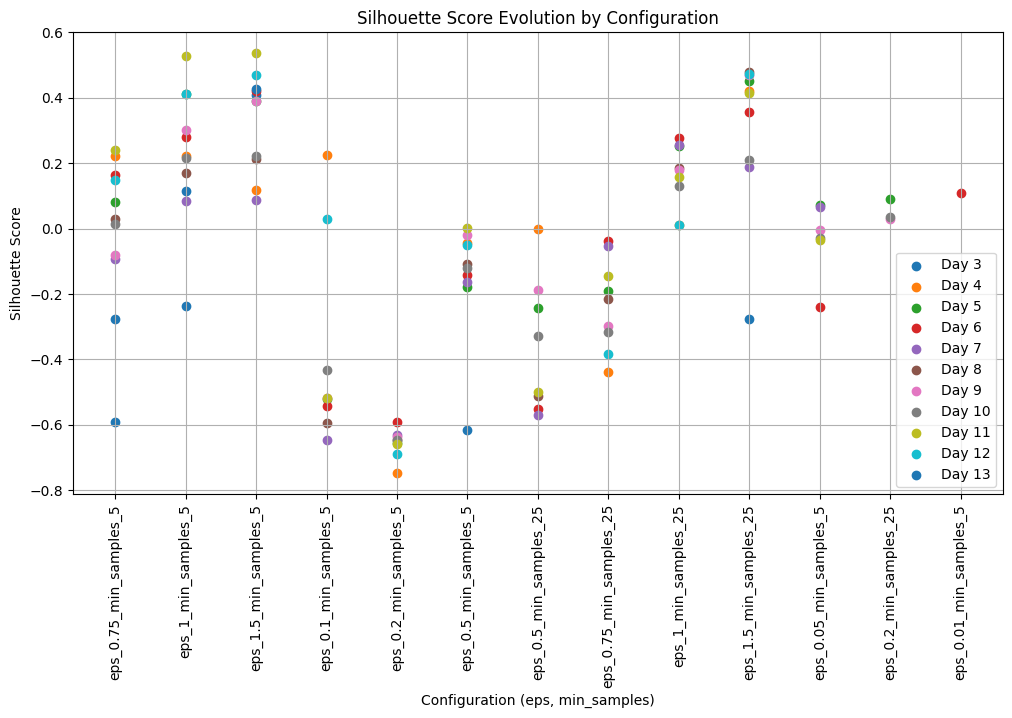

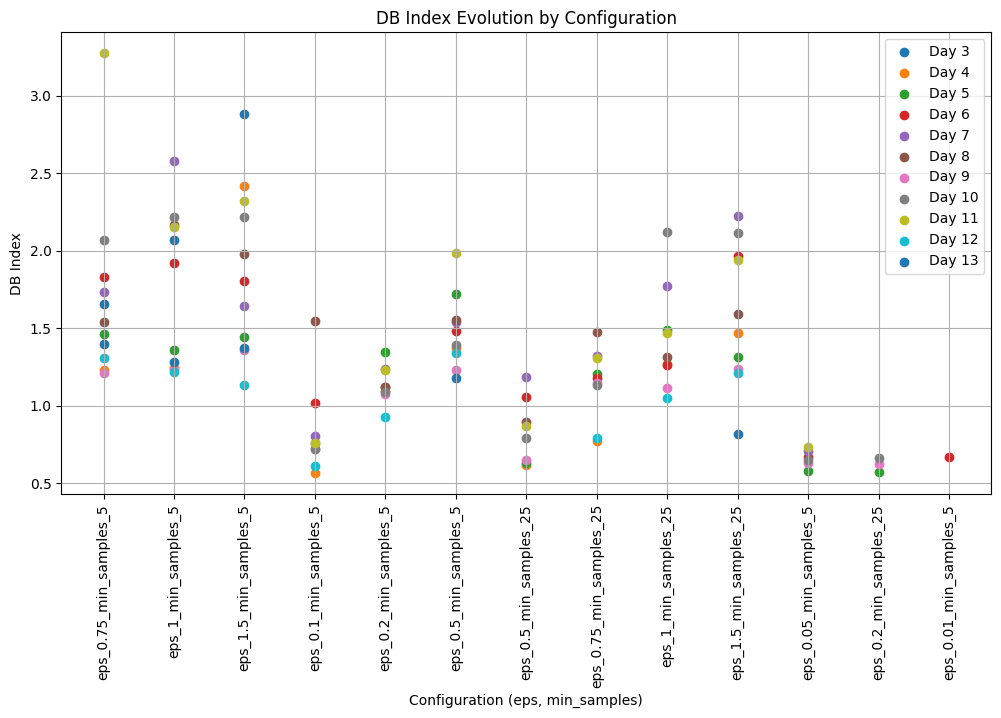

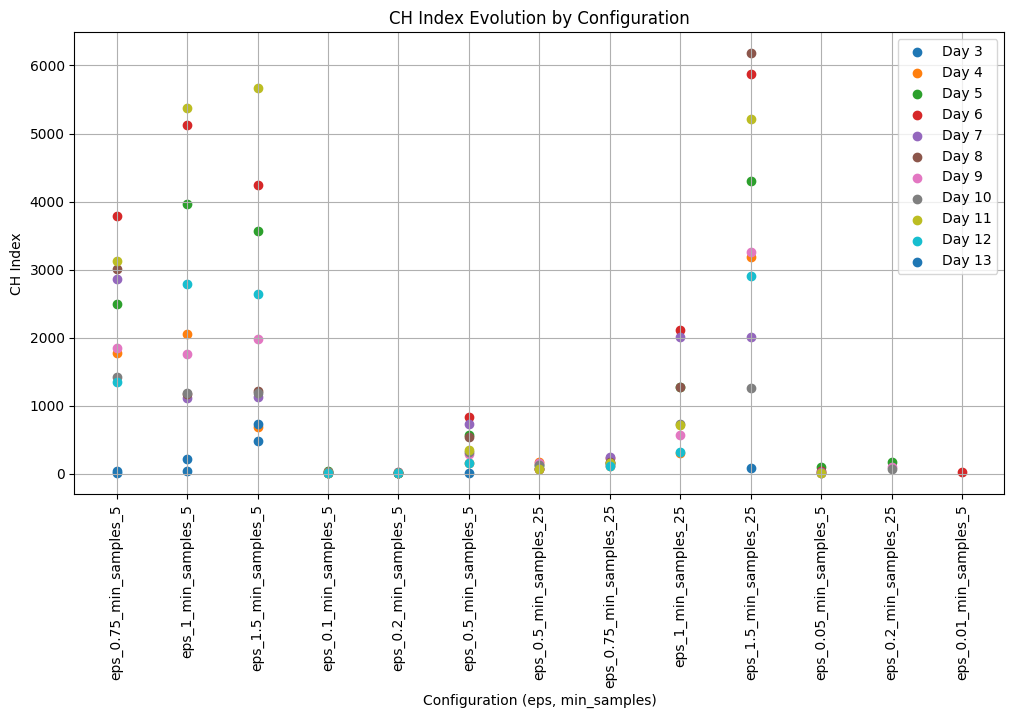

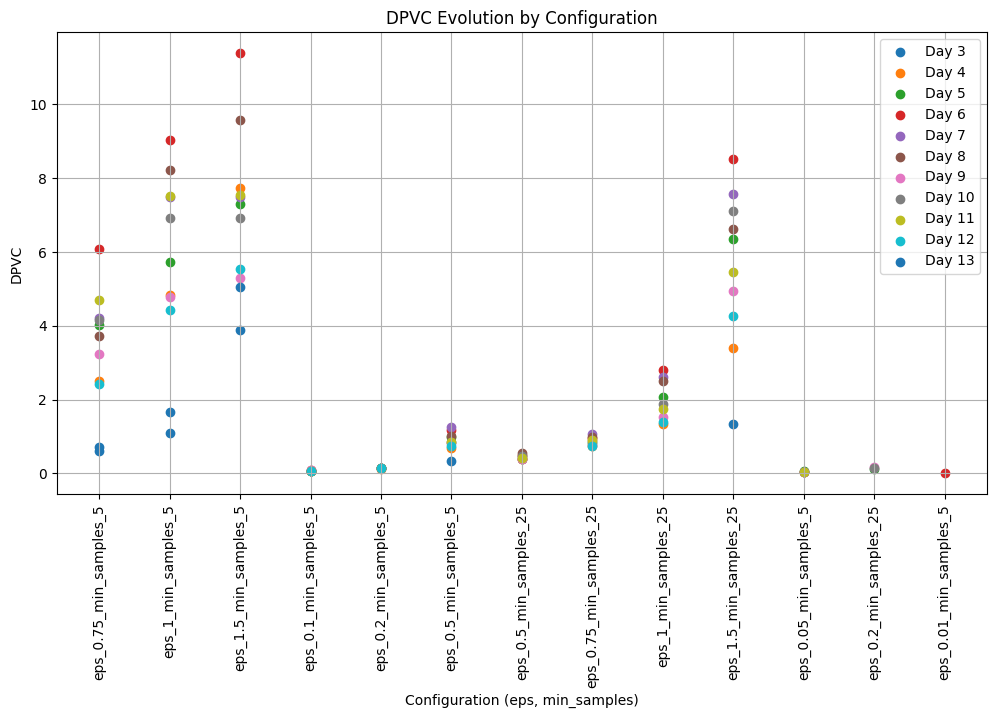

In [18]:
import pickle as pkl
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Experiment days
days = list(range(3, 14))  # Days from 3 to 13

# Dictionaries to store results for each eps and min_samples combination
silhouette_results = {day: {} for day in days}
db_results = {day: {} for day in days}
ch_results = {day: {} for day in days}
dpvc_results = {day: {} for day in days}

# Read data
for day in days:
    with open(f"temporal_zamuro/zamuro_clustering_results/Days_Results/AE/DBSCAN_PacMAP_old/{day}/silhouette_eps_[0.01, 0.05, 0.1, 0.2, 0.5, 0.75, 1, 1.5]_min_samples_[5, 25, 150, 300, 500, 1000]", "rb") as file:
        silhouette = pkl.load(file)
    with open(f"temporal_zamuro/zamuro_clustering_results/Days_Results/AE/DBSCAN_PacMAP_old/{day}/DB_eps_[0.01, 0.05, 0.1, 0.2, 0.5, 0.75, 1, 1.5]_min_samples_[5, 25, 150, 300, 500, 1000]", "rb") as file:
        db = pkl.load(file)
    with open(f"temporal_zamuro/zamuro_clustering_results/Days_Results/AE/DBSCAN_PacMAP_old/{day}/CH_eps_[0.01, 0.05, 0.1, 0.2, 0.5, 0.75, 1, 1.5]_min_samples_[5, 25, 150, 300, 500, 1000]", "rb") as file:
        ch = pkl.load(file)
    with open(f"temporal_zamuro/zamuro_clustering_results/Days_Results/AE/DBSCAN_PacMAP_old/{day}/DPVC_eps_[0.01, 0.05, 0.1, 0.2, 0.5, 0.75, 1, 1.5]_min_samples_[5, 25, 150, 300, 500, 1000]", "rb") as file:
        dpvc = pkl.load(file)
    
    # Store values, avoiding None
    for key in silhouette.keys():
        if silhouette[key] is not None:
            silhouette_results[day][key] = silhouette[key]
        if db[key] is not None:
            db_results[day][key] = db[key]
        if ch[key] is not None:
            ch_results[day][key] = ch[key]
        if dpvc[key] is not None:
            dpvc_results[day][key] = dpvc[key]

# Plot individual metric results for all days
def plot_metric(metric_results, metric_name):
    plt.figure(figsize=(12, 6))
    for day in days:
        keys = list(metric_results[day].keys())
        values = [metric_results[day][k] for k in keys]
        plt.scatter(keys, values, label=f"Day {day}")
    plt.xticks(rotation=90)
    plt.title(f"{metric_name} Evolution by Configuration")
    plt.xlabel("Configuration (eps, min_samples)")
    plt.ylabel(metric_name)
    plt.legend()
    plt.grid(True)
    plt.show()

plot_metric(silhouette_results, "Silhouette Score")
plot_metric(db_results, "DB Index")
plot_metric(ch_results, "CH Index")
plot_metric(dpvc_results, "DPVC")

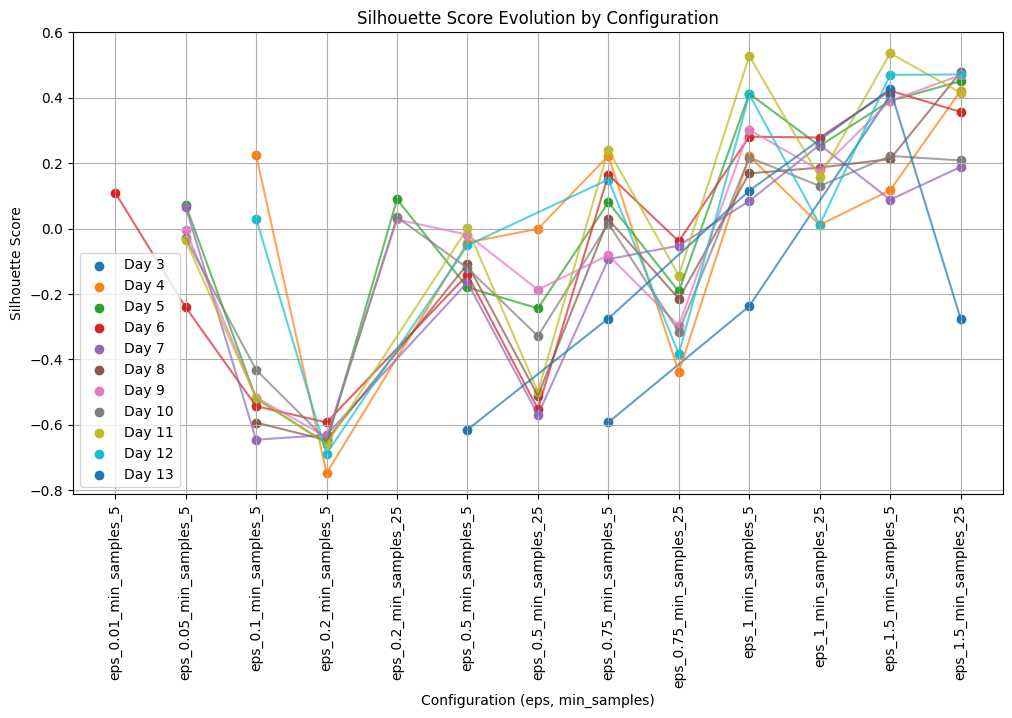

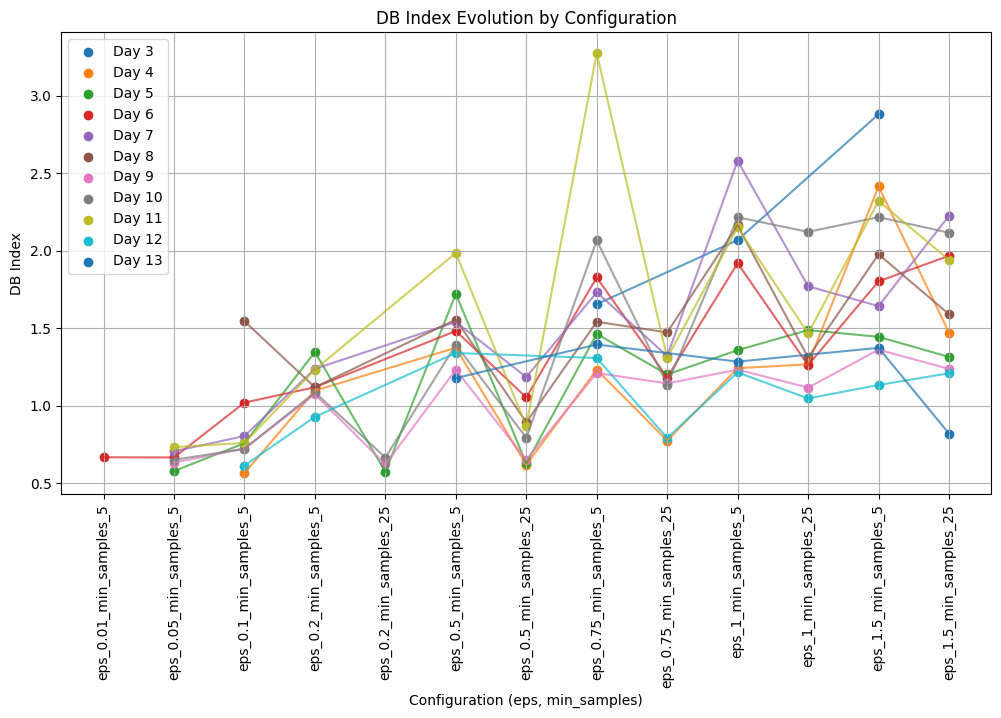

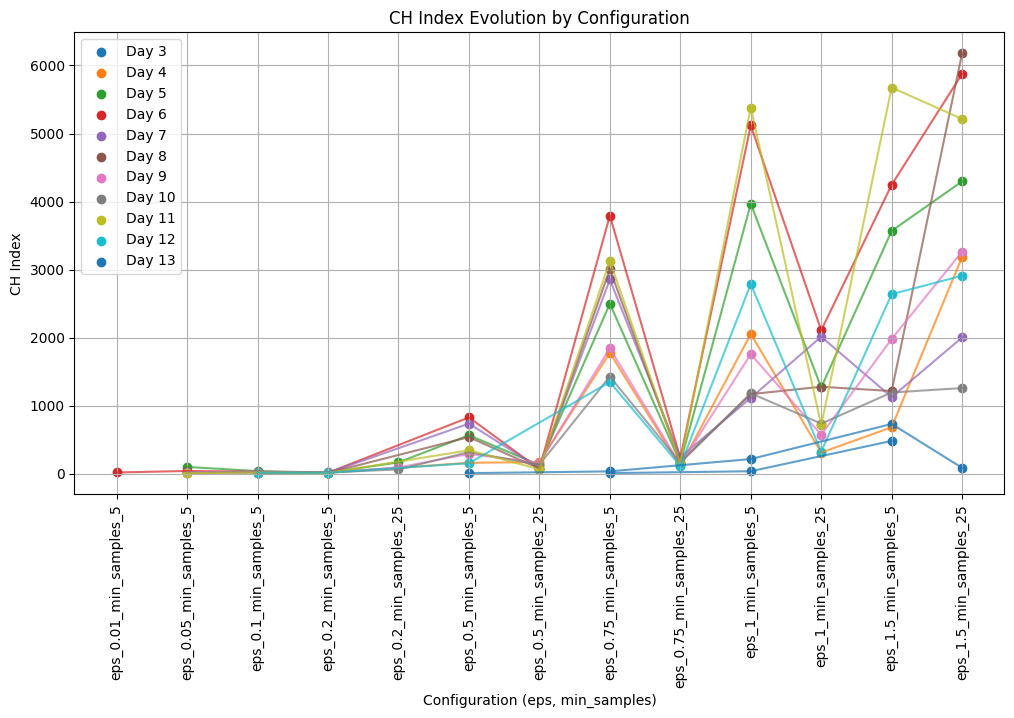

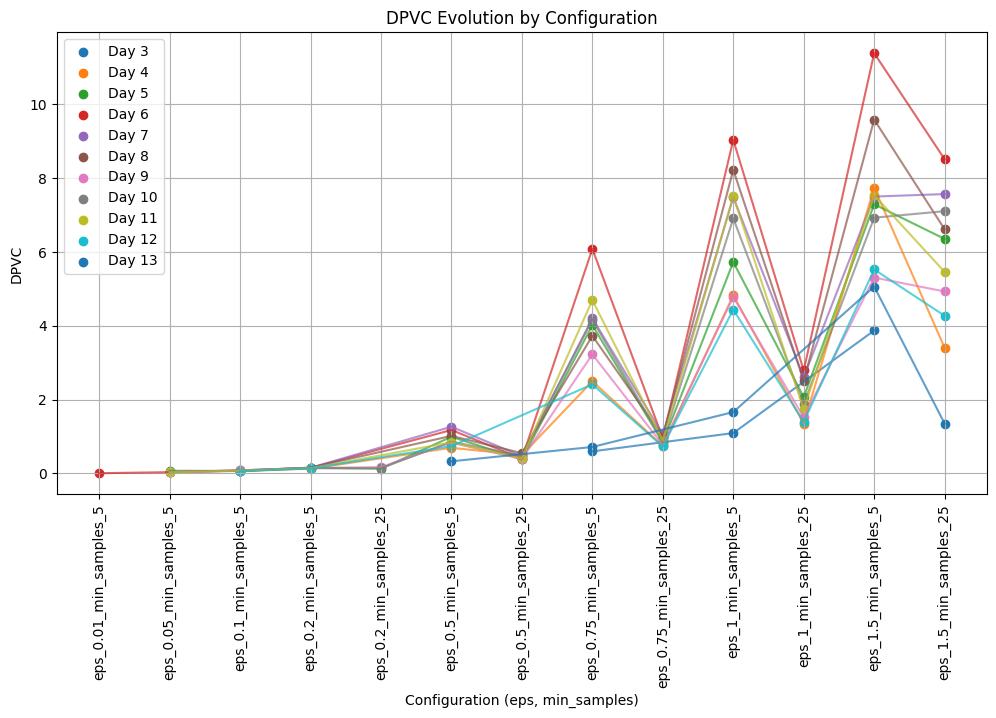

In [25]:
import pickle as pkl
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re  # Para extraer valores numéricos de las claves

# Experiment days
days = list(range(3, 14))  # Days from 3 to 13

# Dictionaries to store results for each eps and min_samples combination
silhouette_results = {day: {} for day in days}
db_results = {day: {} for day in days}
ch_results = {day: {} for day in days}
dpvc_results = {day: {} for day in days}

# Read data
for day in days:
    with open(f"temporal_zamuro/zamuro_clustering_results/Days_Results/AE/DBSCAN_PacMAP_old/{day}/silhouette_eps_[0.01, 0.05, 0.1, 0.2, 0.5, 0.75, 1, 1.5]_min_samples_[5, 25, 150, 300, 500, 1000]", "rb") as file:
        silhouette = pkl.load(file)
    with open(f"temporal_zamuro/zamuro_clustering_results/Days_Results/AE/DBSCAN_PacMAP_old/{day}/DB_eps_[0.01, 0.05, 0.1, 0.2, 0.5, 0.75, 1, 1.5]_min_samples_[5, 25, 150, 300, 500, 1000]", "rb") as file:
        db = pkl.load(file)
    with open(f"temporal_zamuro/zamuro_clustering_results/Days_Results/AE/DBSCAN_PacMAP_old/{day}/CH_eps_[0.01, 0.05, 0.1, 0.2, 0.5, 0.75, 1, 1.5]_min_samples_[5, 25, 150, 300, 500, 1000]", "rb") as file:
        ch = pkl.load(file)
    with open(f"temporal_zamuro/zamuro_clustering_results/Days_Results/AE/DBSCAN_PacMAP_old/{day}/DPVC_eps_[0.01, 0.05, 0.1, 0.2, 0.5, 0.75, 1, 1.5]_min_samples_[5, 25, 150, 300, 500, 1000]", "rb") as file:
        dpvc = pkl.load(file)
    
    # Store values, avoiding None
    for key in silhouette.keys():
        if silhouette[key] is not None:
            silhouette_results[day][key] = silhouette[key]
        if db[key] is not None:
            db_results[day][key] = db[key]
        if ch[key] is not None:
            ch_results[day][key] = ch[key]
        if dpvc[key] is not None:
            dpvc_results[day][key] = dpvc[key]

# Function to extract numerical values from key strings
def parse_key(key):
    match = re.findall(r"[\d\.]+", key)  # Extract numbers
    return float(match[0]), int(match[1])  # (eps, min_samples)

# Get a sorted list of all possible configurations (eps, min_samples)
all_keys = sorted(
    {key for day in days for key in silhouette_results[day].keys()},
    key=parse_key
)

# Function to plot correctly ordered metrics with complete x-axis labels
def plot_metric(metric_results, metric_name):
    plt.figure(figsize=(12, 6))
    
    for day in days:
        # Extract and sort results for the current day
        sorted_items = sorted(metric_results[day].items(), key=lambda x: parse_key(x[0]))
        sorted_keys, values = zip(*sorted_items) if sorted_items else ([], [])

        # Map keys to their correct x-axis positions
        x_values = [all_keys.index(k) for k in sorted_keys]

        plt.scatter(x_values, values, label=f"Day {day}")  # Scatter for clarity
        plt.plot(x_values, values, linestyle='-', alpha=0.7)  # Add line for trend

    plt.xticks(range(len(all_keys)), all_keys, rotation=90)
    plt.title(f"{metric_name} Evolution by Configuration")
    plt.xlabel("Configuration (eps, min_samples)")
    plt.ylabel(metric_name)
    plt.legend()
    plt.grid(True)
    plt.show()

# Plot ordered metrics with complete x-axis labels
plot_metric(silhouette_results, "Silhouette Score")
plot_metric(db_results, "DB Index")
plot_metric(ch_results, "CH Index")
plot_metric(dpvc_results, "DPVC")



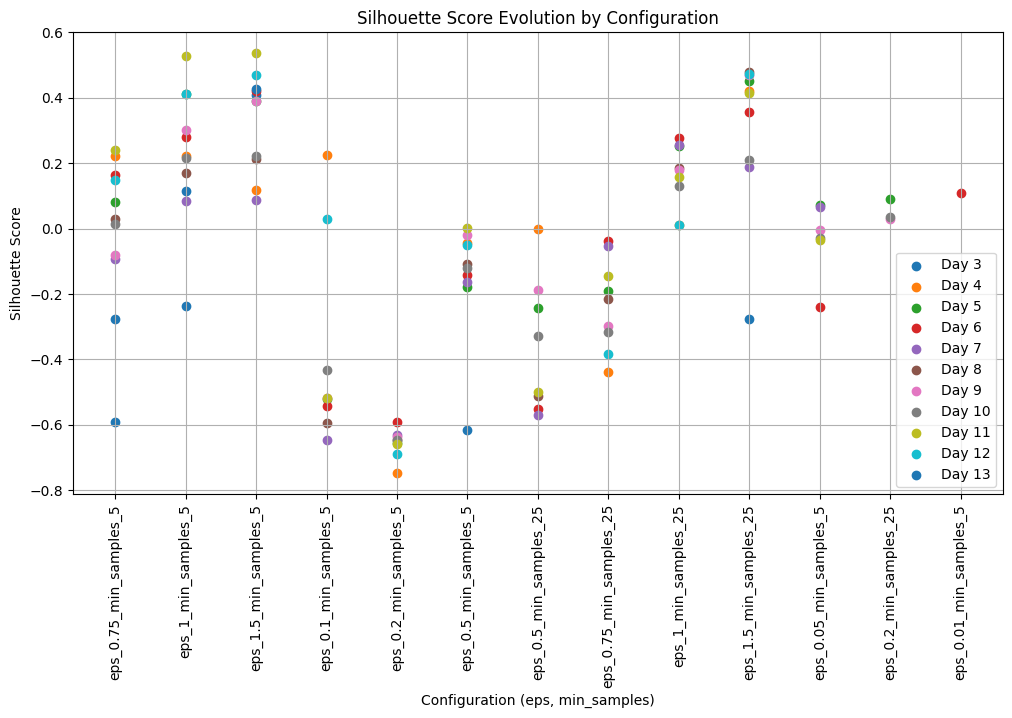

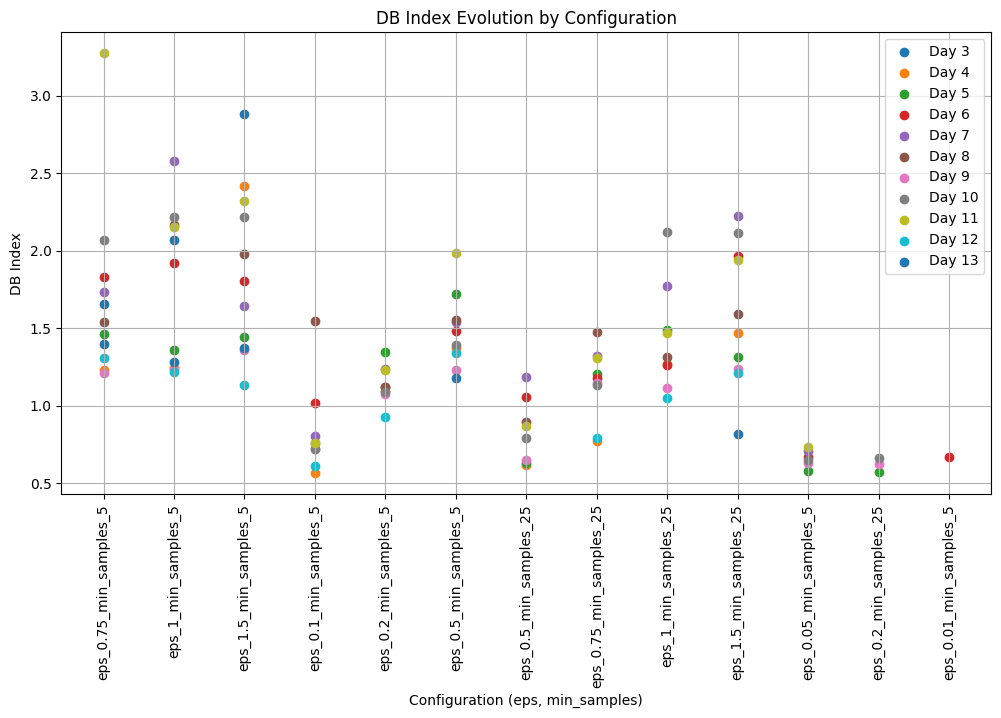

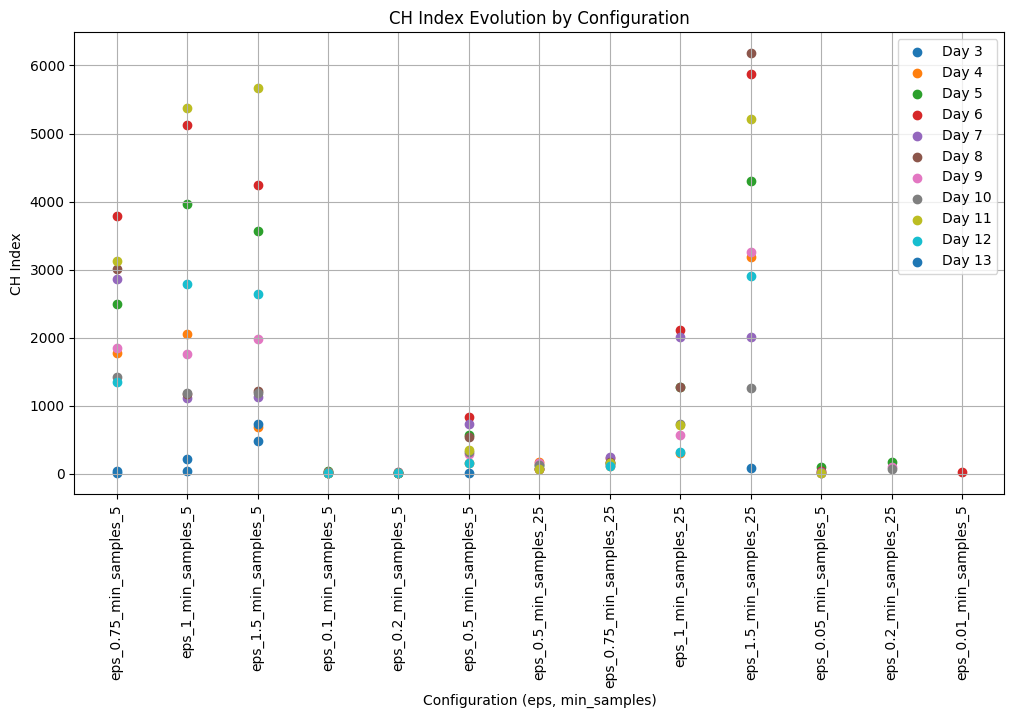

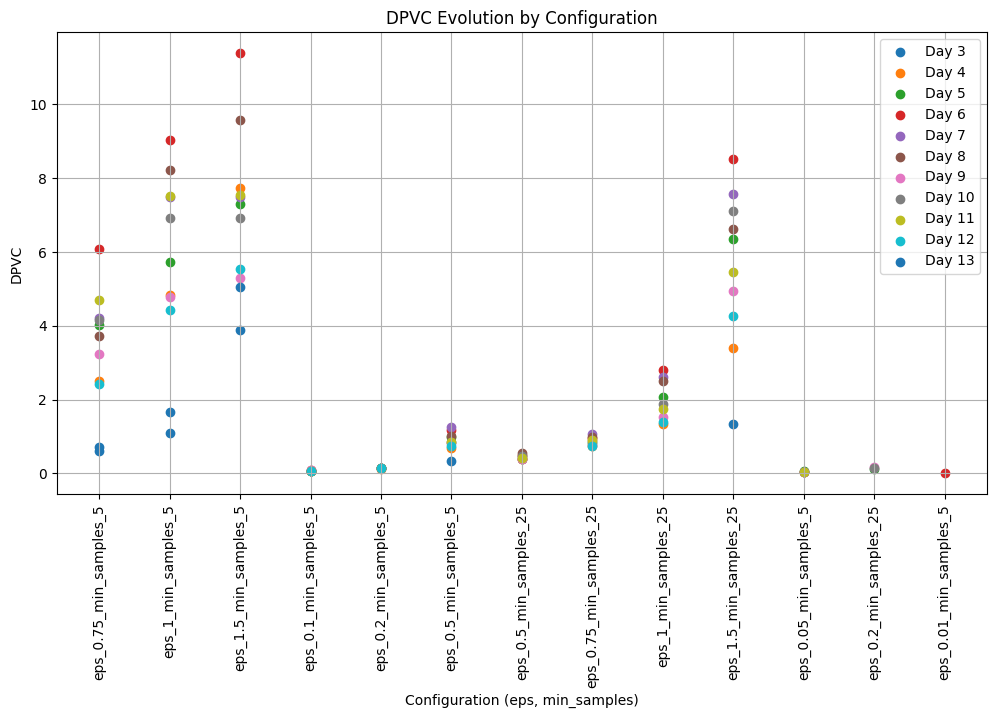

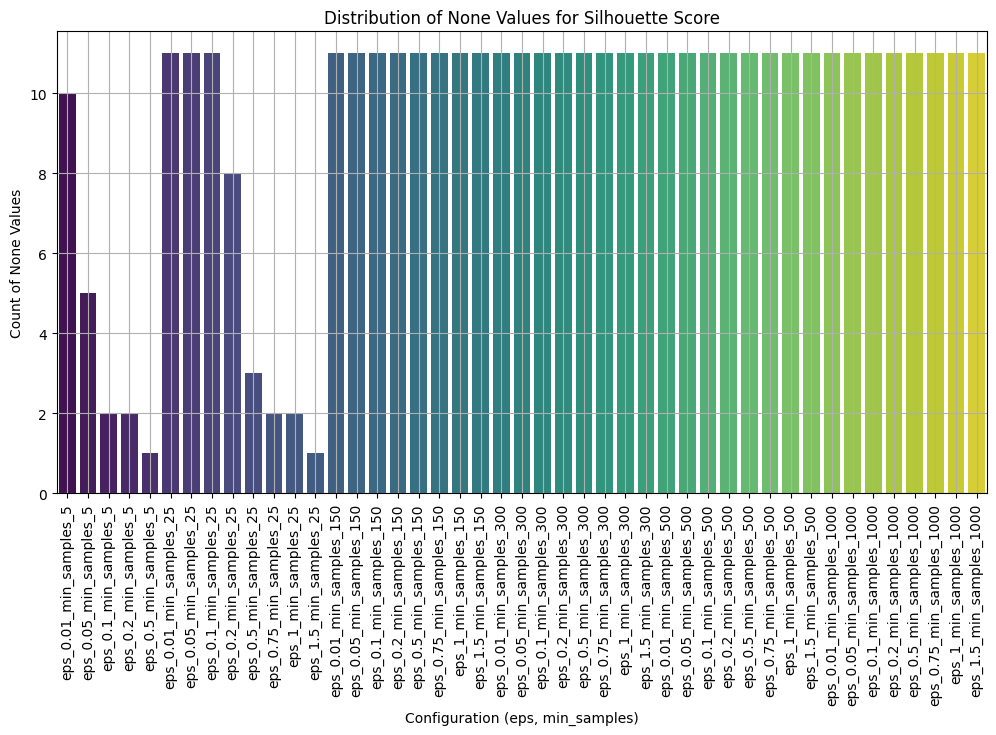

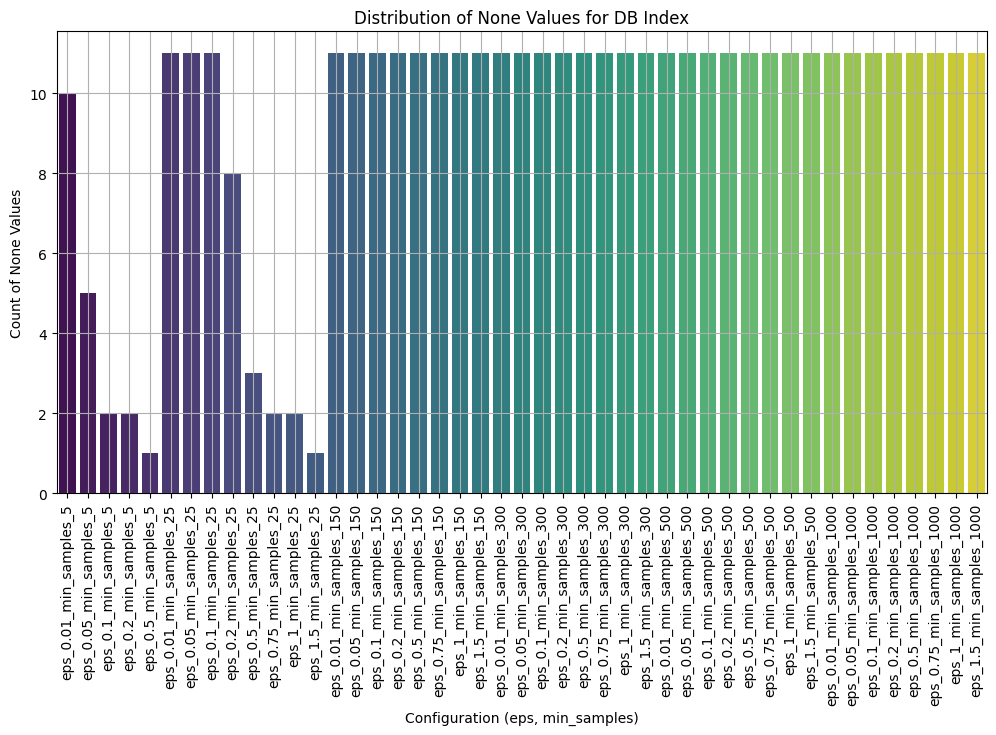

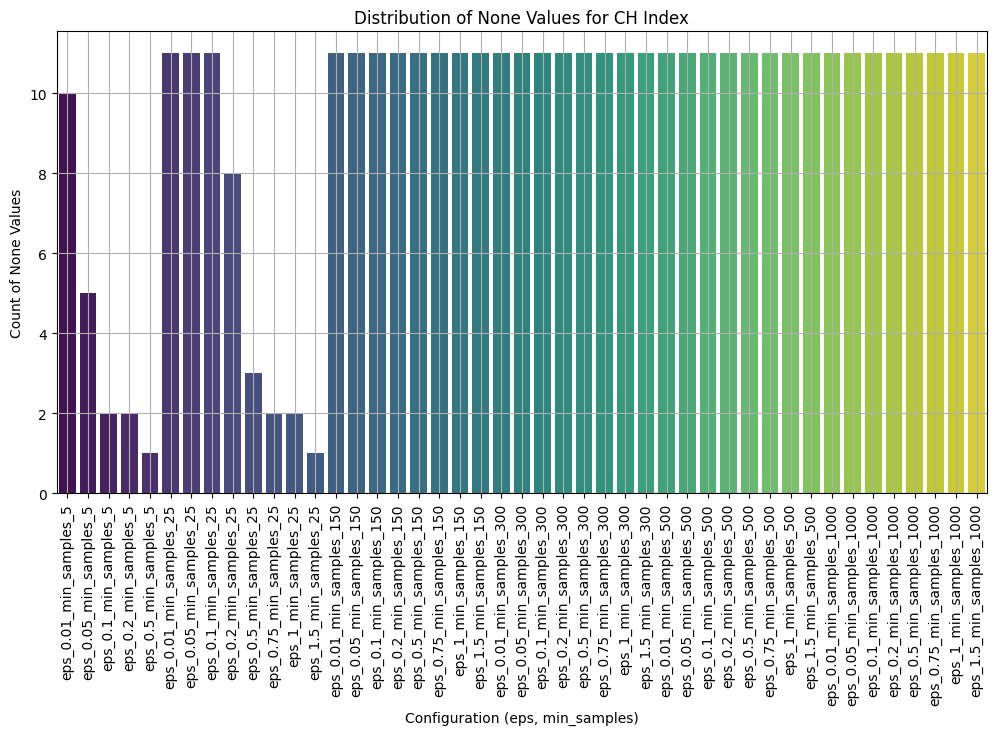

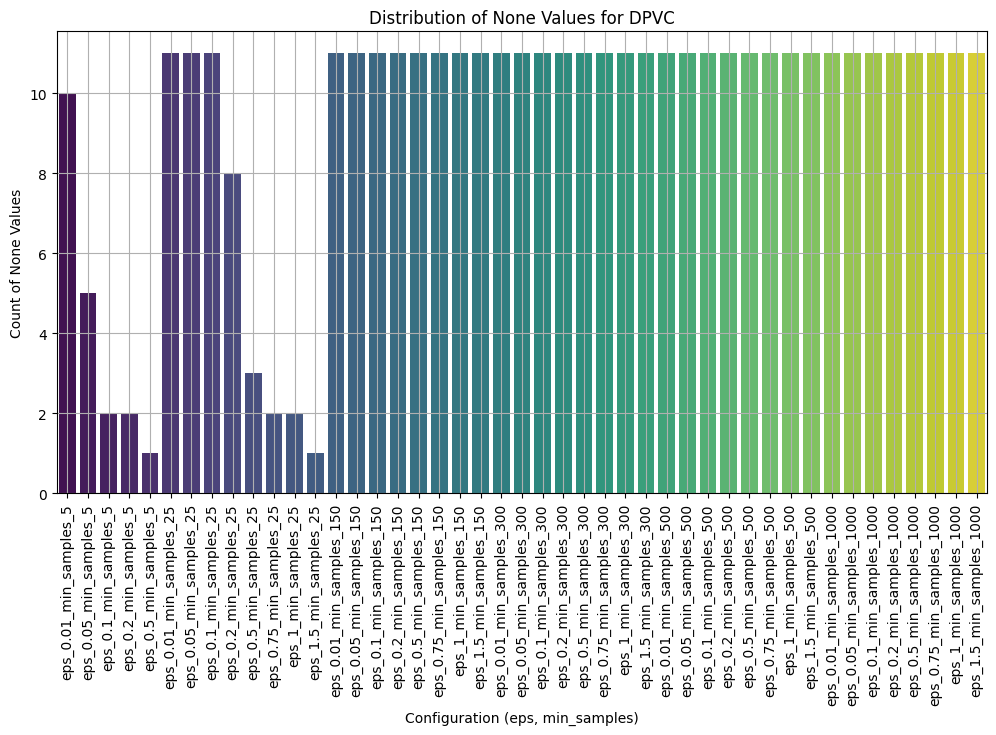

In [23]:
import pickle as pkl
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict

# Experiment days
days = list(range(3, 14))  # Days from 3 to 13

# Dictionaries to store results for each eps and min_samples combination
silhouette_results = {day: {} for day in days}
db_results = {day: {} for day in days}
ch_results = {day: {} for day in days}
dpvc_results = {day: {} for day in days}

# Store counts of None values per configuration per metric
none_counts_silhouette = defaultdict(int)
none_counts_db = defaultdict(int)
none_counts_ch = defaultdict(int)
none_counts_dpvc = defaultdict(int)

# Read data
for day in days:
    with open(f"temporal_zamuro/zamuro_clustering_results/Days_Results/AE/DBSCAN_PacMAP_old/{day}/silhouette_eps_[0.01, 0.05, 0.1, 0.2, 0.5, 0.75, 1, 1.5]_min_samples_[5, 25, 150, 300, 500, 1000]", "rb") as file:
        silhouette = pkl.load(file)
    with open(f"temporal_zamuro/zamuro_clustering_results/Days_Results/AE/DBSCAN_PacMAP_old/{day}/DB_eps_[0.01, 0.05, 0.1, 0.2, 0.5, 0.75, 1, 1.5]_min_samples_[5, 25, 150, 300, 500, 1000]", "rb") as file:
        db = pkl.load(file)
    with open(f"temporal_zamuro/zamuro_clustering_results/Days_Results/AE/DBSCAN_PacMAP_old/{day}/CH_eps_[0.01, 0.05, 0.1, 0.2, 0.5, 0.75, 1, 1.5]_min_samples_[5, 25, 150, 300, 500, 1000]", "rb") as file:
        ch = pkl.load(file)
    with open(f"temporal_zamuro/zamuro_clustering_results/Days_Results/AE/DBSCAN_PacMAP_old/{day}/DPVC_eps_[0.01, 0.05, 0.1, 0.2, 0.5, 0.75, 1, 1.5]_min_samples_[5, 25, 150, 300, 500, 1000]", "rb") as file:
        dpvc = pkl.load(file)
    
    # Store values, avoiding None
    for key in silhouette.keys():
        if silhouette[key] is not None:
            silhouette_results[day][key] = silhouette[key]
        else:
            none_counts_silhouette[key] += 1
        if db[key] is not None:
            db_results[day][key] = db[key]
        else:
            none_counts_db[key] += 1
        if ch[key] is not None:
            ch_results[day][key] = ch[key]
        else:
            none_counts_ch[key] += 1
        if dpvc[key] is not None:
            dpvc_results[day][key] = dpvc[key]
        else:
            none_counts_dpvc[key] += 1

# Function to plot None distributions
def plot_none_distribution(none_counts, metric_name):
    plt.figure(figsize=(12, 6))
    configs = list(none_counts.keys())
    none_values = [none_counts[k] for k in configs]
    sns.barplot(x=configs, y=none_values, palette="viridis")
    plt.xticks(rotation=90)
    plt.xlabel("Configuration (eps, min_samples)")
    plt.ylabel("Count of None Values")
    plt.title(f"Distribution of None Values for {metric_name}")
    plt.grid(True)
    plt.show()

# Plot None distributions per metric
plot_none_distribution(none_counts_silhouette, "Silhouette Score")
plot_none_distribution(none_counts_db, "DB Index")
plot_none_distribution(none_counts_ch, "CH Index")
plot_none_distribution(none_counts_dpvc, "DPVC")